In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import scipy.ndimage as ndimage
from skimage import measure, morphology, segmentation
import matplotlib.pyplot as plt
import math
import time
import cv2 as cv
from PIL import Image
import glob
import matplotlib.image as mpimg

In [ ]:
# count = 0
# for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/data/sample_png_train_data/ID00317637202283194142136'):
#   count  += len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/data/sample_png_train_data/"+str(i)))

In [ ]:
len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/data/sample_png_train_data/ID00317637202283194142136'))

501

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/data/sample_png_train_mask_data/'
data_path_al = '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/data/ıpf mask results/'

In [ ]:
def calc_ratio(mask):
  unique, counts = np.unique(mask, return_counts=True)
  # print(np.asarray((unique, counts)).T)
  # Maske üzerinde beyaz pikselleri say
  if np.max(mask) == 255:
    white_pixel_count = np.sum(mask == 255)
  else : white_pixel_count = np.sum(mask == 1)
  black_pixel_count = np.sum(mask == 0)
  # print(white_pixel_count,black_pixel_count)
  # Toplam piksel sayısı
  total_pixel_count = mask.shape[0] * mask.shape[1]
  # print(mask.shape[0],mask.shape[1],total_pixel_count)
  # Oranı hesapla
  ratio = 100*(white_pixel_count / total_pixel_count)
  # print(f"img white_pixel_count -->  {white_pixel_count} img total_pixel_count --> {total_pixel_count } ratio -->  {ratio}")
  return ratio

In [ ]:
result_data = list()

ID00009637202177434476278= A

ID00010637202177584971671=B

ID00015637202177877247924=C

ID00317637202283194142136=D

ID00358637202295388077032=E

dicti = {"ID00009637202177434476278": "A", "ID00010637202177584971671": "B" ,"ID00015637202177877247924" : "C", "ID00317637202283194142136": "D", "ID00358637202295388077032": "E" }

In [ ]:
for id in os.listdir(data_path_al):
  # result = list()
  counter_id  = None
  if id == "ID00009637202177434476278" : counter_id = "A"

  elif id == "ID00010637202177584971671": counter_id = "B"

  elif id == "ID00015637202177877247924": counter_id ="C"

  elif id == "ID00317637202283194142136": counter_id = "D"

  elif id == "ID00358637202295388077032": counter_id = "E"
  # if id == "ID00009637202177434476278":
  for file in os.listdir(data_path_al + id):
      # if file == "176.png":
        img = mpimg.imread(data_path_al + id + "/" + file)
        ret,thresh1 = cv.threshold(img,0,255,cv.THRESH_BINARY)
        # print(file , end = " --> ")
        ratio = calc_ratio(thresh1)
        result_data.append([counter_id , int(file[:-4]) , ratio])

  # result_data[id] = result


In [ ]:
img = mpimg.imread("/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/data/WhatsApp Image 2023-12-09 at 14.14.23.jpeg")
# print(file , end = " --> ")
ratio = calc_ratio(img)

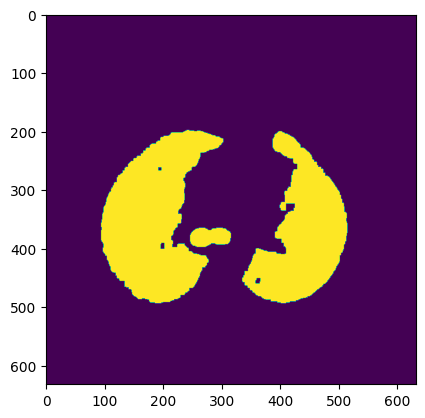

In [ ]:
plt.imshow(thresh1)
plt.show()

In [ ]:
ret,thresh1 = cv.threshold(img,0,255,cv.THRESH_BINARY)
ratio = calc_ratio(thresh1)

In [ ]:
unique, counts = np.unique(img, return_counts=True)
print(np.asarray((unique, counts)).T)


[[      0 1375755]
 [      1    5949]
 [      2    4461]
 [      3    3366]
 [      4    2085]
 [      5    1434]
 [      6     621]
 [      7     522]
 [      8     219]
 [      9      60]
 [     10      51]
 [     11      18]
 [     12      12]
 [    243      15]
 [    244      15]
 [    245      45]
 [    246      45]
 [    247     177]
 [    248     546]
 [    249     612]
 [    250    1239]
 [    251    1848]
 [    252    2823]
 [    253    4149]
 [    254    5163]
 [    255  358242]]


In [ ]:
result_data


[['B', 1, 0.96893310546875],
 ['B', 101, 0.8514404296875],
 ['B', 103, 1.4190673828125],
 ['B', 100, 0.6977081298828125],
 ['B', 10, 1.1066436767578125],
 ['B', 102, 1.1474609375],
 ['B', 106, 1.09710693359375],
 ['B', 104, 1.381683349609375],
 ['B', 11, 0.945281982421875],
 ['B', 105, 1.3286590576171875],
 ['B', 15, 3.266143798828125],
 ['B', 14, 2.6397705078125],
 ['B', 12, 1.1890411376953125],
 ['B', 13, 1.75933837890625],
 ['B', 18, 5.414581298828125],
 ['B', 19, 6.11572265625],
 ['B', 16, 3.916168212890625],
 ['B', 17, 4.7454833984375],
 ['B', 21, 7.4920654296875],
 ['B', 2, 0.8556365966796875],
 ['B', 20, 6.8141937255859375],
 ['B', 22, 8.193206787109375],
 ['B', 24, 9.603500366210938],
 ['B', 26, 10.856246948242188],
 ['B', 25, 10.17303466796875],
 ['B', 23, 8.933258056640625],
 ['B', 29, 12.849807739257812],
 ['B', 28, 12.103652954101562],
 ['B', 27, 11.46240234375],
 ['B', 31, 13.430023193359375],
 ['B', 32, 13.666915893554688],
 ['B', 3, 0.28839111328125],
 ['B', 30, 13.20838

In [ ]:
df_me = pd.DataFrame(np.array(result_data), columns = ["Name"	,"Slice_no",	"Lung_ratio(Alihan)"])
df_me[["Slice_no", "Lung_ratio(Alihan)"]] = df_me[["Slice_no", "Lung_ratio(Alihan)"]].apply(pd.to_numeric)
df_me = df_me.sort_values(by=['Name',"Slice_no"], ascending=True).reset_index().drop(["index"],axis=1)
df_me

,Name,Slice_no,Lung_ratio(Alihan)
0,A,1,1.035224
1,A,2,1.054382
2,A,3,1.014370
3,A,4,0.952318
4,A,5,0.917562
...,...,...,...
1603,E,308,1.669154
1604,E,309,1.591792
1605,E,310,1.564503
1606,E,311,1.571263


In [ ]:
# df_me[df_me["Name"] == "D"][50:100]

In [ ]:
x = [803,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893]

In [ ]:
df_me.drop(x,inplace=True)

In [ ]:
df_me = df_me.reset_index().drop(["index"],axis=1)
df_me

,Name,Slice_no,Lung_ratio(Hüseyin)
0,A,1,0.0
1,A,2,0.0
2,A,3,0.0
3,A,4,0.0
4,A,5,0.0
...,...,...,...
1603,E,308,0.0
1604,E,309,0.0
1605,E,310,0.0
1606,E,311,0.0


In [ ]:
ratio_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/results/lung_ratio_results.csv",index_col=0)

In [ ]:
df_org = ratio_df.sort_values(by=['Name',"Slice_no"], ascending=True).reset_index().drop(["index"],axis=1)
df_org

,Name,Slice_no,Lung_ratio(Zeynep),Lung_ratio(Hüseyin),difference_z_h
0,A,1,0.0,0.0,0.0
1,A,2,0.0,0.0,0.0
2,A,3,0.1,0.0,0.1
3,A,4,0.1,0.0,0.1
4,A,5,0.1,0.0,0.1
...,...,...,...,...,...
1603,E,308,0.9,0.0,0.9
1604,E,309,0.0,0.0,0.0
1605,E,310,0.1,0.0,0.1
1606,E,311,1.1,0.0,1.1


In [ ]:
final_df = pd.concat([df_org ,df_me["Lung_ratio(Alihan)"] ],axis = 1)
final_df = final_df[["Name"	,"Slice_no",	"Lung_ratio(Zeynep)"	,"Lung_ratio(Hüseyin)" ,"Lung_ratio(Alihan)",	"difference_z_h"	]]
final_df

,Name,Slice_no,Lung_ratio(Zeynep),Lung_ratio(Hüseyin),Lung_ratio(Alihan),difference_z_h
0,A,1,0.0,0.0,1.035224,0.0
1,A,2,0.0,0.0,1.054382,0.0
2,A,3,0.1,0.0,1.014370,0.1
3,A,4,0.1,0.0,0.952318,0.1
4,A,5,0.1,0.0,0.917562,0.1
...,...,...,...,...,...,...
1603,E,308,0.9,0.0,1.669154,0.9
1604,E,309,0.0,0.0,1.591792,0.0
1605,E,310,0.1,0.0,1.564503,0.1
1606,E,311,1.1,0.0,1.571263,1.1


In [ ]:
final_df["difference_z_h"] = abs(final_df["Lung_ratio(Zeynep)"] - final_df["Lung_ratio(Hüseyin)"])
final_df["difference_z_a"] = abs(final_df["Lung_ratio(Zeynep)"] - final_df["Lung_ratio(Alihan)"])
final_df["difference_h_a"] = abs(final_df["Lung_ratio(Hüseyin)"] - final_df["Lung_ratio(Alihan)"])
final_df

,Name,Slice_no,Lung_ratio(Zeynep),Lung_ratio(Hüseyin),Lung_ratio(Alihan),difference_z_h,difference_z_a,difference_h_a
0,A,1,0.0,0.0,1.035224,0.0,1.035224,1.035224
1,A,2,0.0,0.0,1.054382,0.0,1.054382,1.054382
2,A,3,0.1,0.0,1.014370,0.1,0.914370,1.014370
3,A,4,0.1,0.0,0.952318,0.1,0.852318,0.952318
4,A,5,0.1,0.0,0.917562,0.1,0.817562,0.917562
...,...,...,...,...,...,...,...,...
1603,E,308,0.9,0.0,1.669154,0.9,0.769154,1.669154
1604,E,309,0.0,0.0,1.591792,0.0,1.591792,1.591792
1605,E,310,0.1,0.0,1.564503,0.1,1.464503,1.564503
1606,E,311,1.1,0.0,1.571263,1.1,0.471263,1.571263


In [ ]:
final_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/results/lung_ratio_final_results.csv")

In [58]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/results/lung_ratio_final_results.csv")

In [59]:
df

,Unnamed: 0,Name,Slice_no,Lung_ratio(Zeynep),Lung_ratio(Hüseyin),Lung_ratio(Alihan),difference_z_h,difference_z_a,difference_h_a
0,0,A,1,0.0,0.0,1.035224,0.0,1.035224,1.035224
1,1,A,2,0.0,0.0,1.054382,0.0,1.054382,1.054382
2,2,A,3,0.1,0.0,1.014370,0.1,0.914370,1.014370
3,3,A,4,0.1,0.0,0.952318,0.1,0.852318,0.952318
4,4,A,5,0.1,0.0,0.917562,0.1,0.817562,0.917562
...,...,...,...,...,...,...,...,...,...
1603,1603,E,308,0.9,0.0,1.669154,0.9,0.769154,1.669154
1604,1604,E,309,0.0,0.0,1.591792,0.0,1.591792,1.591792
1605,1605,E,310,0.1,0.0,1.564503,0.1,1.464503,1.564503
1606,1606,E,311,1.1,0.0,1.571263,1.1,0.471263,1.571263


In [62]:
df[["difference_z_h","difference_z_a",	"difference_h_a"]].describe()

,difference_z_h,difference_z_a,difference_h_a
count,1608.000000,1608.000000,1608.000000
mean,5.704117,6.081237,1.620571
std,6.696612,7.616569,0.845035
min,0.000000,0.003488,0.051117
25%,0.402487,0.658392,0.866971
50%,3.053319,1.430203,1.780543
75%,8.929560,10.580724,2.269372
max,22.198443,24.322849,3.506577
